In [2]:
library(repr)
library(tidyverse)
source("tests.R")
source("cleanup.R")
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 row

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message in file(filename, "r", encoding = encoding):
“cannot open file 'tests.R': No such file or directory”


ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 170 Columns: 55
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (55): Atr1, Atr2, Atr3, Atr4, Atr5, Atr6, Atr7, Atr8, Atr9, Atr10, Atr11...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Atr2,Atr6,Atr11,Atr18,Atr26,Atr40
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2.869048,1.130952,3.214286,2.97619,2.809524,3.571429


Atribute,value
<chr>,<dbl>
Atr2,2.869048
Atr6,1.130952
Atr11,3.214286
Atr18,2.976190
Atr26,2.809524
Atr40,3.571429


Atribute,value
<chr>,<dbl>
Atr2,0.46511628
Atr6,0.37209302
Atr11,0.19767442
Atr18,0.09302326
Atr26,0.19767442
Atr40,0.20930233


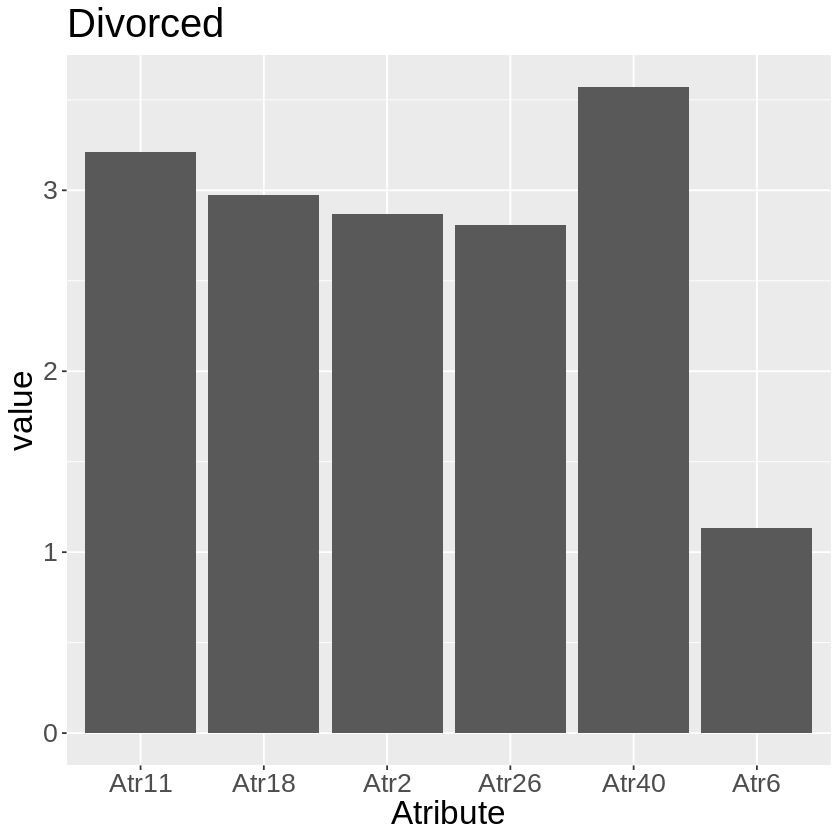

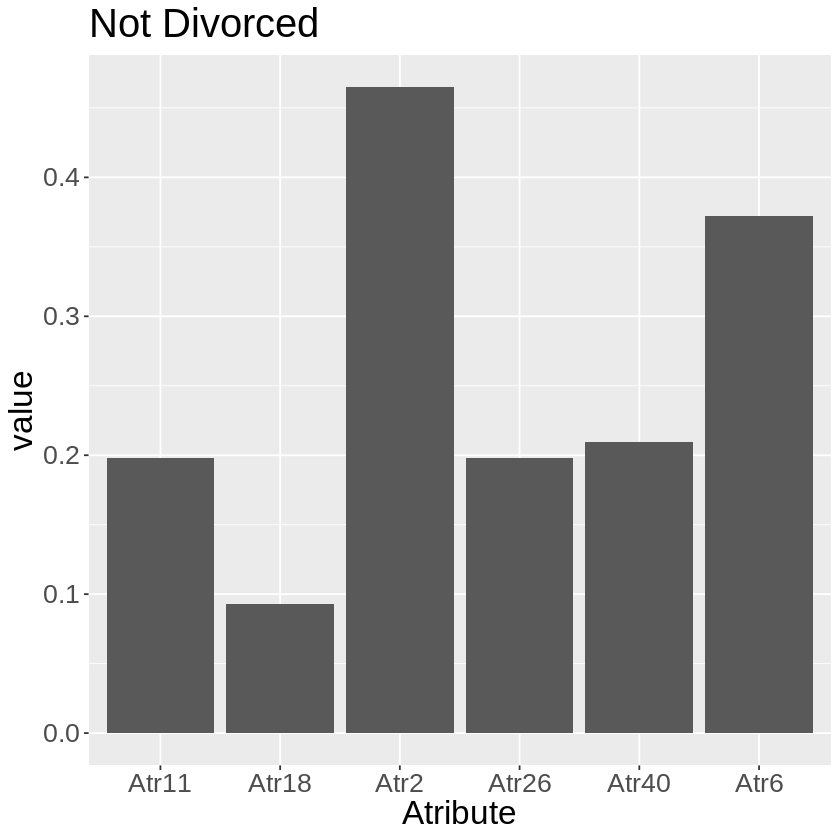

In [3]:
#Reading in the data from github
div_data <- read_csv2("https://raw.githubusercontent.com/shjuliay/group107/main/divorce%20(1).csv") %>%
mutate(Divorced = as.factor(Class)) %>%
select(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40, Divorced)
#div_data

#Creating a table of the number of divorced and not divorced
div_sum <- div_data %>%
group_by(Divorced) %>%
    summarize(n = n())
#div_sum


#Creating a table for the mean answer for each question
atr_sum <- div_data %>%
select(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40) %>%
map_df(mean) 
#atr_sum



sum_div <- div_data %>%
filter(Divorced == 1) %>%
select(-Divorced) %>%
    map_df(mean)
sum_div

sum_div_longer <- sum_div %>%
pivot_longer(cols = (c(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40)),
             names_to = "Atribute")
sum_div_longer

sum_notdiv <- div_data %>%
filter(Divorced == 0) %>%
select(-Divorced) %>%
    map_df(mean) 
#sum_notdiv

sum_notdiv_longer <- sum_notdiv %>%
pivot_longer(cols = (c(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40)),
             names_to = "Atribute")
sum_notdiv_longer

#no rows have missing data

#creating visualizations of 6 predictor questions
sum_div_bar <- sum_div_longer %>%
ggplot(aes(x = Atribute, y = value)) +
geom_bar(stat = "identity") +
theme(text = element_text(size = 20)) +
ggtitle("Divorced")
sum_div_bar

sum_notdiv_bar <- sum_notdiv_longer %>%
ggplot(aes(x = Atribute, y = value)) +
geom_bar(stat = "identity") +
theme(text = element_text(size = 20)) +
ggtitle("Not Divorced")
sum_notdiv_bar

In [4]:
#Reading in the questions
div_questions <- read_delim("https://raw.githubusercontent.com/shjuliay/group107/main/DivorceQuestions.txt", delim = ":", col_names = FALSE) %>%
mutate(QuestionNumber = X1, Question = X2) %>%
select(QuestionNumber, Question)
#div_questions

div_6questions <- div_questions %>%
filter(QuestionNumber == 2 | QuestionNumber == 6 | QuestionNumber == 11 | QuestionNumber == 18 | QuestionNumber == 26 | QuestionNumber == 40)
div_6questions

Rows: 55 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ":"
chr (1): X2
dbl (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


QuestionNumber,Question
<dbl>,<chr>
2,"I know we can ignore our differences, even if things get hard sometimes."
6,We don't have time at home as partners.
11,"I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other."
18,My spouse and I have similar ideas about how marriage should be
26,I know my spouse's basic anxieties.
40,We're just starting a discussion before I know what's going on.
